In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('ipl.csv')

In [3]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
df.shape

(76014, 15)

In [5]:
df.tail()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129
76013,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,129,8,19.6,47,1,47,13,129


In [6]:
unwanted_columns=['mid','venue','batsman','bowler','striker','non-striker']
df.drop(labels=unwanted_columns,axis=1,inplace=True)

In [7]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [8]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [9]:
selected_teams=['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians','Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Sunrisers Hyderabad']

In [10]:
df=df[(df['bat_team'].isin(selected_teams)) & (df['bowl_team'].isin(selected_teams))]

In [11]:
df=df[df['overs']>=5.0]

In [12]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [13]:
print(df['bat_team'].unique())
print(df['bowl_team'].unique())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']


In [14]:
from datetime import datetime
df['date']=df['date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

In [15]:
df.dtypes

date              datetime64[ns]
bat_team                  object
bowl_team                 object
runs                       int64
wickets                    int64
overs                    float64
runs_last_5                int64
wickets_last_5             int64
total                      int64
dtype: object

DATA PREPROCESSING

In [16]:
model_df=pd.get_dummies(data=df,columns=['bat_team','bowl_team'])

In [17]:
model_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [18]:
model_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [19]:
model_df=model_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad','runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total']]

In [20]:
model_df.head()

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,...,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,61,0,5.1,59,0,222
33,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,61,1,5.2,59,1,222
34,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,61,1,5.3,59,1,222
35,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,61,1,5.4,59,1,222
36,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,61,1,5.5,58,1,222


SPLITTING THE DATA

In [21]:
X_train=model_df.drop(labels='total',axis=1)[model_df['date'].dt.year<=2016]

In [22]:
X_test=model_df.drop(labels='total',axis=1)[model_df['date'].dt.year>=2017]

In [23]:
y_train=model_df[model_df['date'].dt.year<=2016]['total'].values
y_test=model_df[model_df['date'].dt.year>=2017]['total'].values

In [24]:
X_train.drop(labels='date',axis=True,inplace=True)
X_test.drop(labels='date',axis=True,inplace=True)


In [25]:
X_train.head()

,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,...,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5
32,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,61,0,5.1,59,0
33,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,61,1,5.2,59,1
34,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,61,1,5.3,59,1
35,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,61,1,5.4,59,1
36,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,61,1,5.5,58,1


In [26]:
X_test.head()

,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,...,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5
68894,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,46,1,5.1,42,1
68895,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,50,1,5.2,46,1
68896,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,50,1,5.3,44,1
68897,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,54,1,5.4,48,1
68898,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,58,1,5.5,51,1


MODEL BUILDING USING ML

In [27]:
from sklearn.linear_model import Lasso

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
lasso=Lasso()
params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}

In [30]:
lasso_regressor=GridSearchCV(lasso,params,scoring='neg_mean_squared_error',cv=5)

In [31]:
lasso_regressor.fit(X_train,y_train)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.466e+06, tolerance: 2.530e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.471e+06, tolerance: 2.547e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.647e+06, tolerance: 

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [32]:
print(lasso_regressor.best_params_)

{'alpha': 1}


In [33]:
lasso=Lasso(alpha=1)

In [34]:
lasso.fit(X_train,y_train)

Lasso(alpha=1)

In [35]:
pred=lasso.predict(X_test)

In [36]:
pred

array([170.86580971, 174.25430596, 173.47515444, ..., 105.85981486,
       104.87745245,  98.97252065])

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

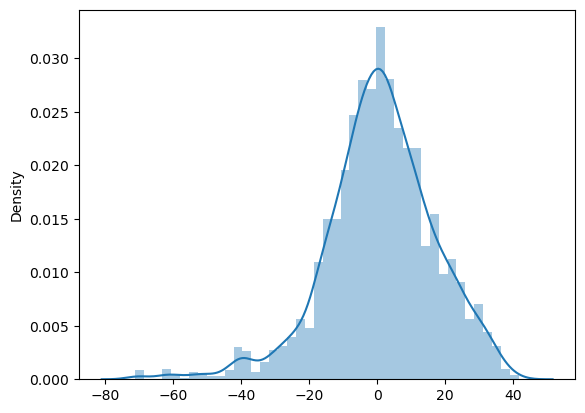

In [37]:
sns.distplot(y_test-pred)

In [38]:
from sklearn import metrics

In [39]:
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))



MAE: 12.213583996827493
MSE: 262.36538279606964
RMSE: 16.19769683615759


In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
rf=RandomForestRegressor()

In [42]:
from sklearn.model_selection import RandomizedSearchCV

In [43]:
n_estimators=[int(x) for x in np.linspace(start=200,stop=800,num=4)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(10,60,num=6)]
max_depth.append(None)
min_samples_split=[2,5,10]
min_samples_leaf=[1,2,4]
bootstrap=[True,False]

In [44]:
random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             'bootstrap':bootstrap
             
            }

In [45]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=10,cv=2,verbose=1,random_state=42,n_jobs=-1)

In [46]:
%%time
rf_random.fit(X_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Wall time: 4min 11s


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800]},
                   random_state=42, verbose=1)

In [47]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [48]:
pred1=rf_random.predict(X_test)

In [49]:
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))



MAE: 12.213583996827493
MSE: 262.36538279606964
RMSE: 16.19769683615759


C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

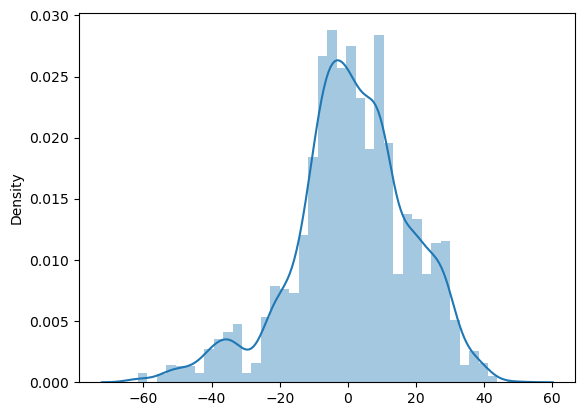

In [50]:
sns.distplot(y_test-pred1)

USING AutoML TPOT

In [51]:
!pip install tpot

In [52]:
import tpot
print('tpot: %s' % tpot.__version__)

C:\Users\KIIT\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


tpot: 0.12.1


In [53]:
from tpot import TPOTRegressor

In [54]:
from sklearn.model_selection import RepeatedKFold

In [55]:
cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)

In [56]:
model=TPOTRegressor(generations=5,population_size=50,scoring='neg_mean_absolute_error',cv=cv,verbosity=2,random_state=1,n_jobs=-1)

In [57]:
model.fit(X_train,y_train)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -4.328808637792266

Generation 2 - Current best internal CV score: -3.3541536446706552

Generation 3 - Current best internal CV score: -2.9530583087775693

Generation 4 - Current best internal CV score: -2.9117197964103942

Generation 5 - Current best internal CV score: -1.9809553687892958

Best pipeline: KNeighborsRegressor(MinMaxScaler(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False)), n_neighbors=6, p=2, weights=distance)


TPOTRegressor(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
              generations=5, n_jobs=-1, population_size=50, random_state=1,
              scoring='neg_mean_absolute_error', verbosity=2)

In [58]:
print(model.score(X_test,y_test))

-22.849498532060316


In [59]:
model.fitted_pipeline_

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('minmaxscaler', MinMaxScaler()),
                ('kneighborsregressor',
                 KNeighborsRegressor(n_neighbors=6, weights='distance'))])

In [61]:
pred=model.predict(X_test)

In [62]:
pred

array([194.        , 194.        , 194.        , ..., 126.55833041,
       125.08797394, 122.33208523])

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

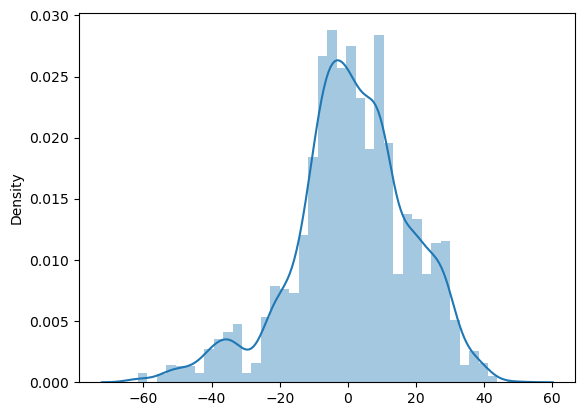

In [63]:
sns.distplot(y_test-pred1)

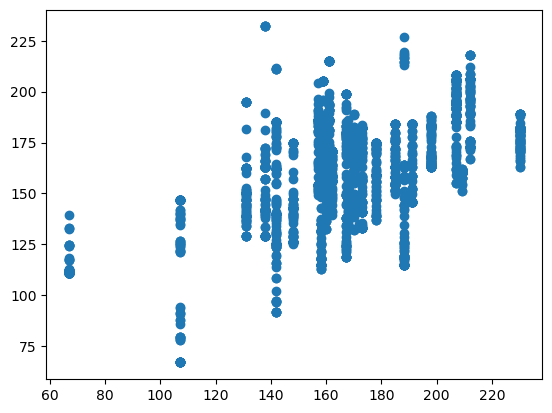

In [64]:
plt.scatter(y_test,pred)

In [65]:
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))



MAE: 22.849498532060316
MSE: 811.5311984370802
RMSE: 28.487386655098433


In [66]:
from sklearn.metrics import r2_score
print("r2_score id ",r2_score(y_test,pred))

r2_score id  0.1990451432750342
